In [ ]:
# Import necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

In [ ]:
# Load the YOLO model from a pretrained checkpoint
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 77.8MB/s]



0: 384x640 1 person, 2 birds, 105.3ms
Speed: 2.4ms preprocess, 105.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


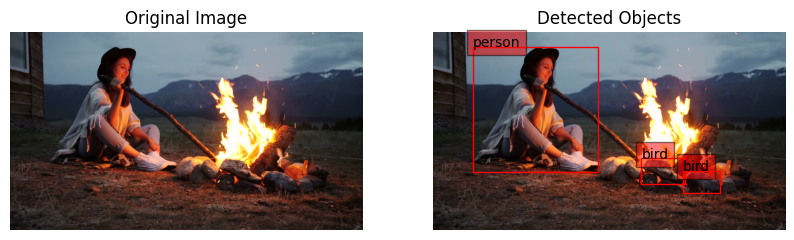


0: 448x640 1 person, 1 car, 28.7ms
Speed: 1.9ms preprocess, 28.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


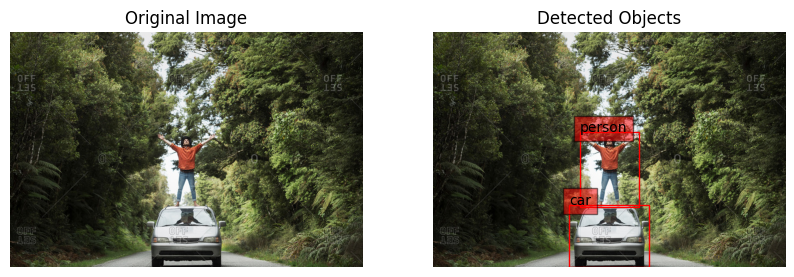


0: 384x640 3 persons, 1 laptop, 26.9ms
Speed: 1.9ms preprocess, 26.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


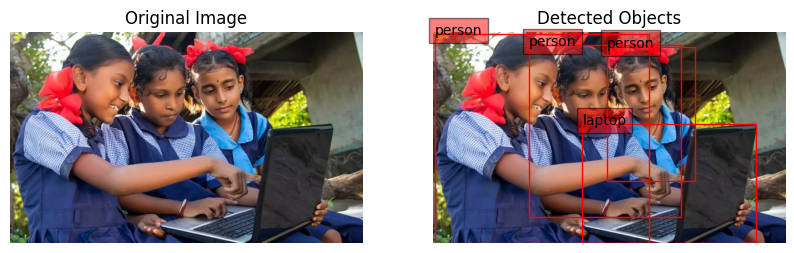


0: 640x448 1 person, 1 kite, 72.7ms
Speed: 4.8ms preprocess, 72.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


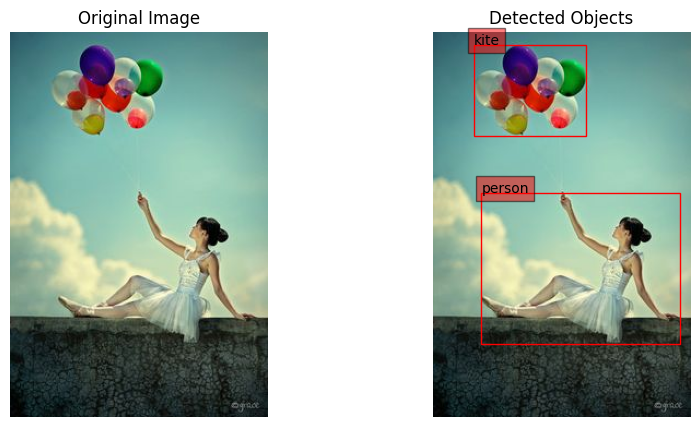


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
0: 448x640 1 person, 1 bowl, 1 sink, 30.9ms
Speed: 6.7ms preprocess, 30.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


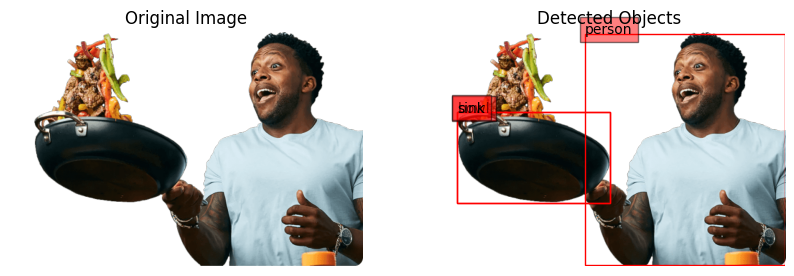

In [ ]:
# Specify the directory
dir_path = r"/content/drive/MyDrive/Test images"

# Get all files in the directory
files = os.listdir(dir_path)

# Filter out the image files
image_files = [file for file in files if file.endswith('.jpg') or file.endswith('.png')]

# Loop over each image file
for image_file in image_files:
    # Load the image
    img = Image.open(os.path.join(dir_path, image_file))

    # Perform object detection
    results = model.predict(img)

    # Extract bounding boxes
    boxes = results[0].boxes

    # Create a new figure for each image
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot original image
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')  # Turn off axis

    # Plot image with bounding boxes
    ax[1].imshow(img)
    ax[1].set_title('Detected Objects')
    ax[1].axis('off')  # Turn off axis

    # Loop over each bounding box and add it to the right-side plot
    for box in boxes:
        x1, y1, x2, y2 = [round(x) for x in box.xyxy[0].tolist()]
        class_index = int(box.cls[0])  # Get class index
        class_name = model.names[class_index]  # Get class name using the model's 'names' attribute
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        ax[1].add_patch(rect)
        plt.text(x1, y1, class_name, bbox=dict(facecolor='red', alpha=0.5))  # Add class name text

    plt.show()